In [44]:
import numpy as np
import pandas as pd
import os

from dsc.query_engine import Query_Processor as dscQP
from dsc.dsc_io import load_dsc as __load_dsc__, source_dirs as __source_dirs__

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

import sys
sys.path.append("../analysis/")

import utils
import methodprops
import plot_functions as fplot

In [45]:
dsc_output = "/gpfs/commons/home/sbanerjee/simdata/sparse-regression/gradvi-experiments/trendfiltering"
dsc_fname  = os.path.basename(os.path.normpath(dsc_output))
db = os.path.join(dsc_output, dsc_fname + ".db")
print(db)

/gpfs/commons/home/sbanerjee/simdata/sparse-regression/gradvi-experiments/trendfiltering/trendfiltering.db


In [46]:
target = ["simulate", "simulate.n", "simulate.strue", "simulate.snr", "simulate.sfix", "simulate.dtrue", "fit"]
#condition = ["simulate.sfix == 2", "simulate.signal == 'normal'", "simulate.dims == '(50, 200)'"]
#groups = ["fit_cpt:"]
condition = [""]
qp = dscQP(db, target, condition)
qp_df = qp.output_table
qp_df

,DSC,simulate,simulate.strue,simulate.snr:output,simulate.sfix,simulate.output.file,simulate.n,simulate.dtrue,fit,fit.output.file
0,1,changepoint,0.6,changepoint/changepoint_1,10,changepoint/changepoint_1,4096,0,mr_ash_init,mr_ash_init/changepoint_1_gvma_1_mr_ash_init_1
1,1,changepoint,0.6,changepoint/changepoint_2,10,changepoint/changepoint_2,4096,1,mr_ash_init,mr_ash_init/changepoint_2_gvma_1_mr_ash_init_1
2,2,changepoint,0.6,changepoint/changepoint_3,10,changepoint/changepoint_3,4096,0,mr_ash_init,mr_ash_init/changepoint_3_gvma_1_mr_ash_init_1
3,2,changepoint,0.6,changepoint/changepoint_4,10,changepoint/changepoint_4,4096,1,mr_ash_init,mr_ash_init/changepoint_4_gvma_1_mr_ash_init_1
4,3,changepoint,0.6,changepoint/changepoint_5,10,changepoint/changepoint_5,4096,0,mr_ash_init,mr_ash_init/changepoint_5_gvma_1_mr_ash_init_1
...,...,...,...,...,...,...,...,...,...,...
495,48,changepoint,0.6,changepoint/changepoint_96,10,changepoint/changepoint_96,4096,1,gradvi_compound_scaled_init,gradvi_compound_scaled_init/changepoint_96_gvm...
496,49,changepoint,0.6,changepoint/changepoint_97,10,changepoint/changepoint_97,4096,0,gradvi_compound_scaled_init,gradvi_compound_scaled_init/changepoint_97_gvm...
497,49,changepoint,0.6,changepoint/changepoint_98,10,changepoint/changepoint_98,4096,1,gradvi_compound_scaled_init,gradvi_compound_scaled_init/changepoint_98_gvm...
498,50,changepoint,0.6,changepoint/changepoint_99,10,changepoint/changepoint_99,4096,0,gradvi_compound_scaled_init,gradvi_compound_scaled_init/changepoint_99_gvm...


In [57]:
resdir = "/gpfs/commons/home/sbanerjee/simdata/sparse-regression/gradvi-experiments/trendfiltering"
idsc = 4


data = __load_dsc__(f'{resdir}/changepoint/changepoint_{idsc}.pkl')
res_gvma = __load_dsc__(f'{resdir}/gvma/changepoint_{idsc}_gvma_1.pkl')
res_gradvi = __load_dsc__(f'{resdir}/gradvi_compound_init/changepoint_{idsc}_gvma_1_gradvi_compound_init_1.pkl')
res_cavi = __load_dsc__(f'{resdir}/mr_ash_scaled_init/changepoint_{idsc}_gvma_1_mr_ash_scaled_init_1.rds')
res_gradvi_direct = __load_dsc__(f'{resdir}/gradvi_direct_scaled_init/changepoint_{idsc}_gvma_1_gradvi_direct_scaled_init_1.pkl')

In [58]:
data.keys()

dict_keys(['X', 'Xinv', 'Xscale', 'Xinvscale', 'y', 'ytest', 'ytrue', 'beta', 'snr', 'degree', 'DSC_DEBUG'])

In [59]:
data['snr']

1.7146534936564286

In [60]:
degree = data['degree']
y = data['y']
ytrue = data['ytrue']
yinit = res_gvma['y_init']
gradvi_ypred = res_gradvi['ypred']
gradvi_direct_ypred = res_gradvi_direct['ypred']
cavi_ypred = res_cavi['ypred']

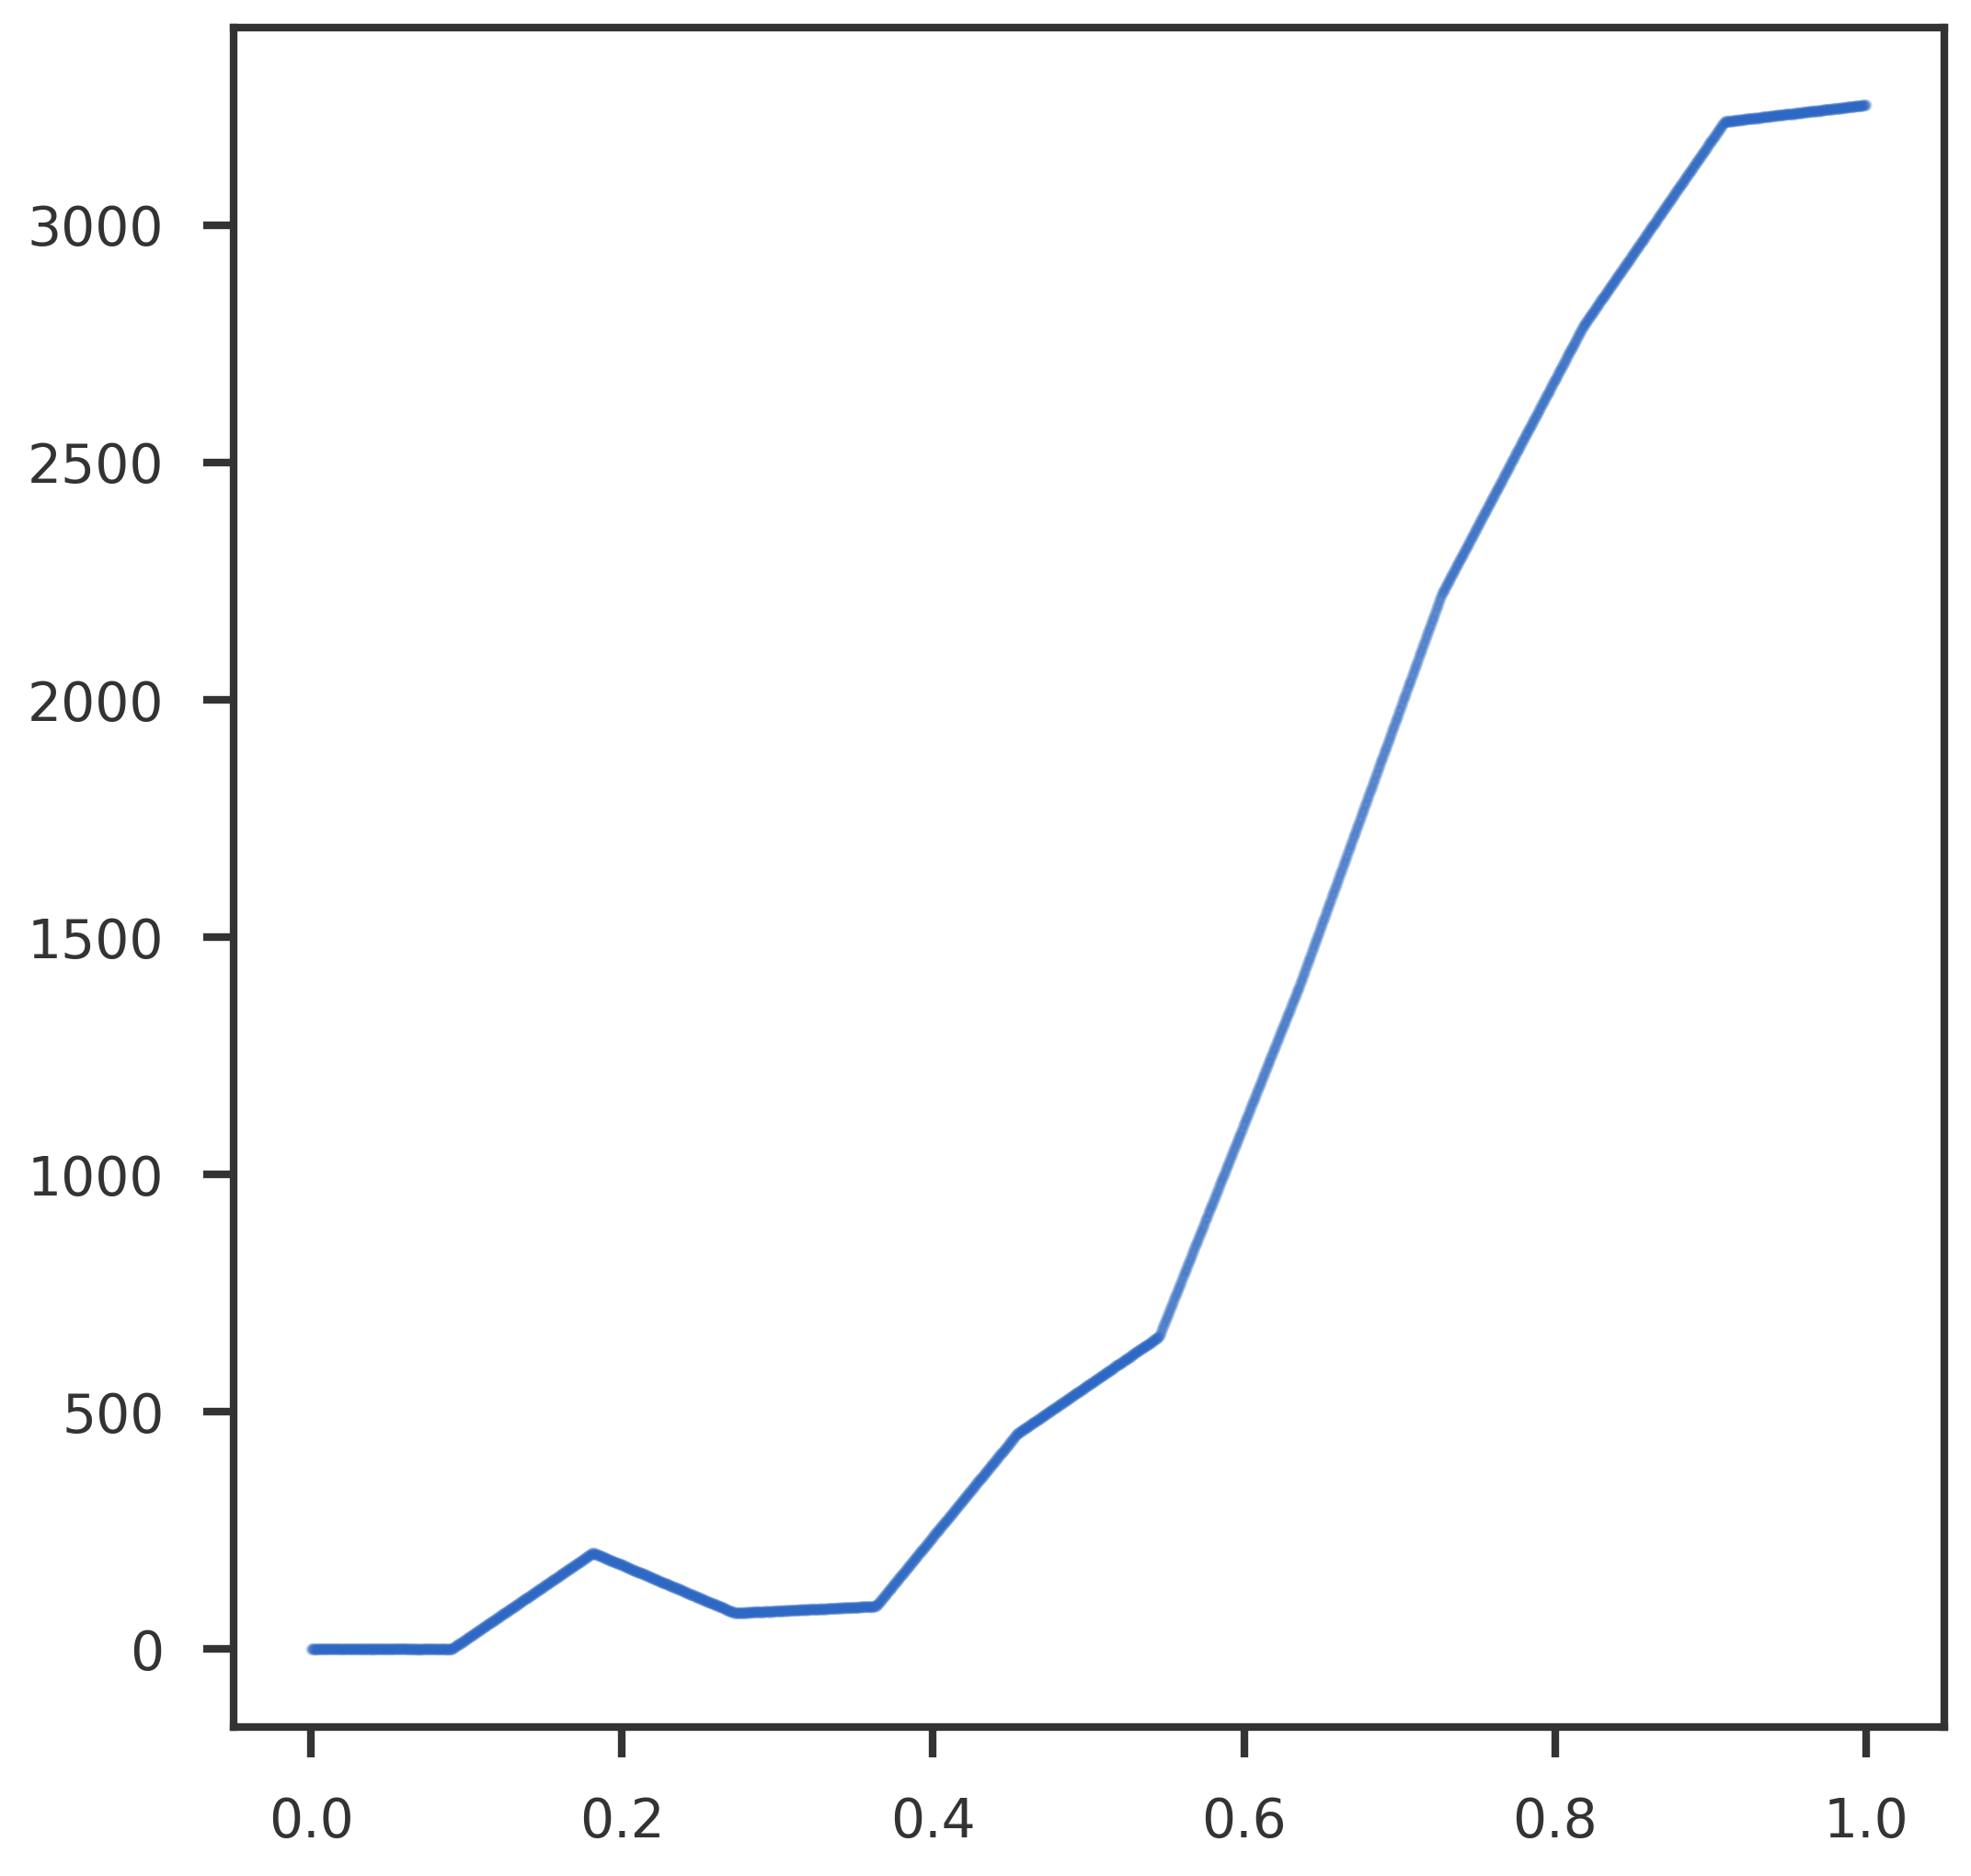

In [61]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

xvals = np.linspace(0, 1, y.shape[0])
ax1.scatter(xvals, y, s = 4, alpha = 0.1)
#ax1.plot(xvals, y, alpha = 0.1)
# ax1.plot(xvals, ytrue, label = "True")
# #ax1.plot(xvals, yinit, label = "Initial y")
# ax1.plot(xvals, gradvi_ypred, label = 'GradvI Compound')
# ax1.plot(xvals, gradvi_direct_ypred, label = 'Gradvi Direct')
# ax1.plot(xvals, cavi_ypred, label = 'CAVI')
ax1.legend()
plt.show()

In [62]:
elbo_gradvi_direct = res_gradvi_direct['model']['elbo_path']
elbo_gradvi_compound = res_gradvi['model']['elbo_path']
elbo_cavi = res_cavi['model']['fit']['varobj']

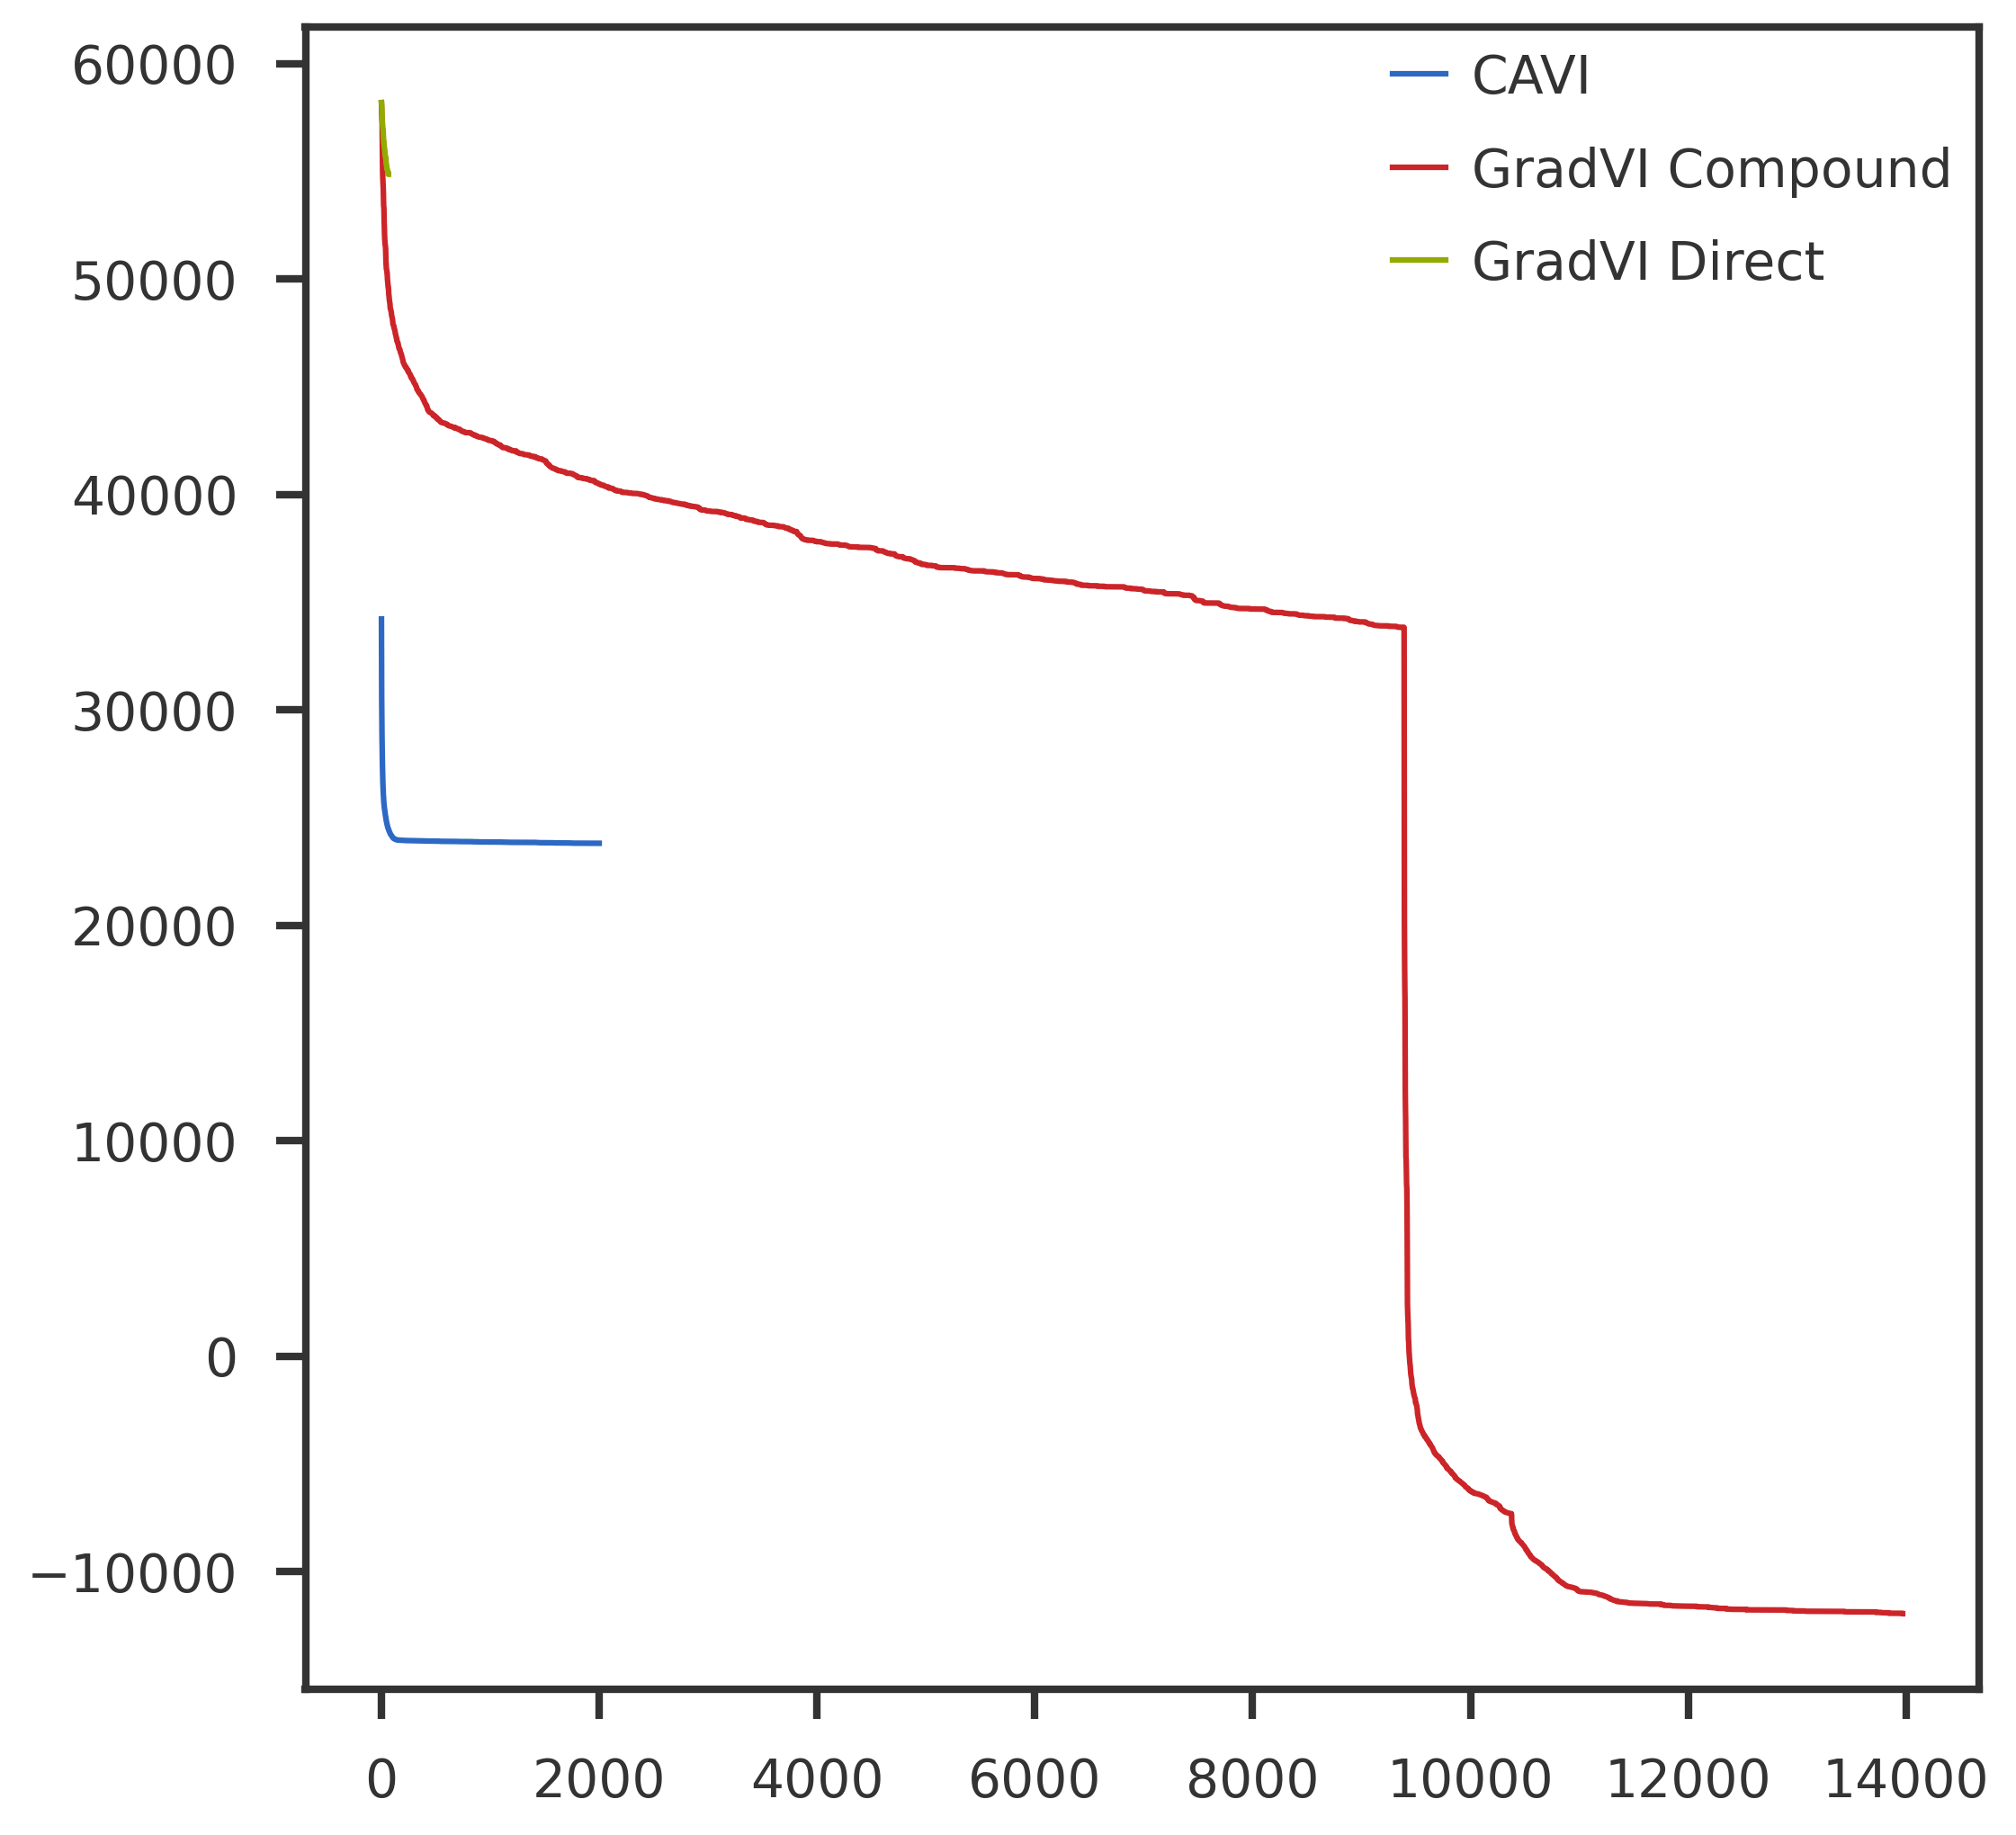

In [63]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(np.arange(elbo_cavi.shape[0]), elbo_cavi, label = 'CAVI')
ax1.plot(np.arange(elbo_gradvi_compound.shape[0]), elbo_gradvi_compound, label = 'GradVI Compound')
ax1.plot(np.arange(elbo_gradvi_direct.shape[0]), elbo_gradvi_direct, label = 'GradVI Direct')

ax1.legend()
plt.show()